In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
df = pd.read_csv("Cluster 1.csv")

In [3]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,...,time_since_last_review,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
0,6891866,unknown,unknown,0.0,2,1.0,Prenzlauer Berg Nordwest,Apartment,Entire home/apt,4,...,6-12 months,0.0,1,5,8,8,2,95.0,0.0,Low
1,11272185,within an hour,100%,0.0,1,0.0,Schmargendorf,Apartment,Entire home/apt,3,...,6-12 months,0.0,1,0,3,5,1,189.0,0.0,Low
2,823087,unknown,unknown,0.0,1,0.0,Pankow Zentrum,Apartment,Private room,4,...,6-12 months,0.0,0,0,1,2,1,50.0,0.0,Low
3,28284389,within an hour,100%,0.0,4,0.0,Schöneberg-Süd,Apartment,Private room,2,...,2-6 months,0.0,0,1,2,10,3,250.0,0.0,Low
4,12194348,within an hour,100%,0.0,1,1.0,Kurfürstendamm,Apartment,Private room,2,...,1+ year,0.0,0,1,5,15,0,120.0,0.0,Low


In [4]:
a = df.loc[df['LTV_potential']=='Low']
a.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,...,time_since_last_review,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
0,6891866,unknown,unknown,0.0,2,1.0,Prenzlauer Berg Nordwest,Apartment,Entire home/apt,4,...,6-12 months,0.0,1,5,8,8,2,95.0,0.0,Low
1,11272185,within an hour,100%,0.0,1,0.0,Schmargendorf,Apartment,Entire home/apt,3,...,6-12 months,0.0,1,0,3,5,1,189.0,0.0,Low
2,823087,unknown,unknown,0.0,1,0.0,Pankow Zentrum,Apartment,Private room,4,...,6-12 months,0.0,0,0,1,2,1,50.0,0.0,Low
3,28284389,within an hour,100%,0.0,4,0.0,Schöneberg-Süd,Apartment,Private room,2,...,2-6 months,0.0,0,1,2,10,3,250.0,0.0,Low
4,12194348,within an hour,100%,0.0,1,1.0,Kurfürstendamm,Apartment,Private room,2,...,1+ year,0.0,0,1,5,15,0,120.0,0.0,Low


In [6]:
a['occupancy_last_year'].mean()

0.32605029190674256

In [7]:
a['price'].mean()

70.29295857763513

In [6]:
len(a.index)

359

In [8]:
b = df.loc[df['LTV_potential']=='High']
b.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,...,time_since_last_review,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
827,28458292,within a few hours,100%,0.0,1,0.0,Kantstraße,Other,Private room,2,...,6-12 months,0.778082,1,1,2,15,0,60.074074,46.742567,High
828,25003945,unknown,unknown,1.0,2,0.0,Frankfurter Allee Süd FK,Other,Private room,3,...,2-6 months,0.975342,1,6,4,5,0,48.000000,46.816438,High
829,22445672,within an hour,100%,0.0,1,0.0,Wedding Zentrum,Apartment,Entire home/apt,4,...,2-6 months,0.936986,1,6,3,7,2,50.000000,46.849315,High
830,23108016,within an hour,100%,1.0,1,0.0,Helmholtzplatz,Apartment,Private room,2,...,2-6 months,0.794521,1,3,5,8,0,59.000000,46.876712,High
831,17998539,unknown,unknown,0.0,1,0.0,Helmholtzplatz,Apartment,Entire home/apt,2,...,1+ year,1.000000,1,3,5,8,0,47.000000,47.000000,High


In [9]:
b['occupancy_last_year'].mean()

0.9319686888454014

In [10]:
b['price'].mean()

87.41682803315304

In [11]:
len(b.index)

1050

In [12]:
c = df.loc[df['LTV_potential']=='Mid']
c.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,...,time_since_last_review,occupancy_last_year,Bakery,Bar,Cafe,Restaurant,Supermarket,price,LTV,LTV_potential
359,17731812,within a day,100%,0.0,1,1.0,südliche Luisenstadt,Other,Private room,3,...,6-12 months,0.857534,0,5,7,7,0,30.000000,25.726027,Mid
360,27011631,unknown,unknown,0.0,1,0.0,Frankfurter Allee Süd FK,Apartment,Private room,3,...,2-6 months,0.515068,1,6,4,5,0,50.000000,25.753425,Mid
361,25281349,within an hour,100%,1.0,1,0.0,südliche Luisenstadt,Apartment,Private room,2,...,2-6 months,0.572603,0,5,7,7,0,45.000000,25.767123,Mid
362,25528333,unknown,unknown,0.0,1,0.0,Neuköllner Mitte/Zentrum,Apartment,Entire home/apt,3,...,6-12 months,0.479452,0,6,5,9,0,53.868421,25.827325,Mid
363,21866021,within an hour,100%,0.0,1,0.0,Tempelhofer Vorstadt,Apartment,Private room,4,...,6-12 months,0.994521,0,6,4,12,0,26.000000,25.857534,Mid


In [13]:
c['occupancy_last_year'].mean()

0.8472778363189317

In [14]:
c['price'].mean()

48.890309555902654

In [15]:
#LTV_potential = Low -> 1
df.loc[df['LTV_potential'].str.contains('Low'),'LTV_potential_num'] = 1

#LTV_potential = Mid -> 2
df.loc[df['LTV_potential'].str.contains('Mid'),'LTV_potential_num'] = 2

#LTV_potential = High -> 3
df.loc[df['LTV_potential'].str.contains('High'),'LTV_potential_num'] = 3

In [15]:
numerical_columns = ['accommodates', 'bathrooms','guests_included',
                     'cleaning_fee', 'extra_people', 'host_days_active', 
                     'host_listings_count', 'maximum_nights', 'minimum_nights', 
                     'number_of_reviews', 'security_deposit','summary_length','description_length',
                    'neighborhood_overview_length']

In [70]:
 Log transforming columns
for col in numerical_columns:
    df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df[col] = np.log(df[col])

SyntaxError: invalid syntax (<ipython-input-70-7f2c669492de>, line 1)

# Dropping variables

Here we drop 'LTV_potential' (categorical string), 'price' and 'occupancy_last_year' because they are used to calculate the measure

In [16]:
df.drop(['price','occupancy_last_year','LTV','LTV_potential'],axis=1,inplace=True)

In [17]:
df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,Neighbourhood,property_type,room_type,accommodates,...,nature_and_views,bedroom_necessities,time_since_first_review,time_since_last_review,Bakery,Bar,Cafe,Restaurant,Supermarket,LTV_potential_num
0,6891866,unknown,unknown,0.0,2,1.0,Prenzlauer Berg Nordwest,Apartment,Entire home/apt,4,...,0.0,0.0,2-3 years,6-12 months,1,5,8,8,2,1.0
1,11272185,within an hour,100%,0.0,1,0.0,Schmargendorf,Apartment,Entire home/apt,3,...,1.0,1.0,6-12 months,6-12 months,1,0,3,5,1,1.0
2,823087,unknown,unknown,0.0,1,0.0,Pankow Zentrum,Apartment,Private room,4,...,0.0,0.0,4+ years,6-12 months,0,0,1,2,1,1.0
3,28284389,within an hour,100%,0.0,4,0.0,Schöneberg-Süd,Apartment,Private room,2,...,0.0,0.0,6-12 months,2-6 months,0,1,2,10,3,1.0
4,12194348,within an hour,100%,0.0,1,1.0,Kurfürstendamm,Apartment,Private room,2,...,0.0,1.0,2-3 years,1+ year,0,1,5,15,0,1.0


# Convert Categorical variables to dummies

In [18]:
# Now generating dummies for categorical varibles to enable multi-collinearity analysis
dummies_df = pd.get_dummies(df)
dummies_df.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,security_deposit,cleaning_fee,guests_included,extra_people,...,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_6-12 months
0,6891866,0.0,2,1.0,4,1.0,0,50,2,20,...,0,1,0,0,1,0,0,0,0,1
1,11272185,0.0,1,0.0,3,1.0,250,120,2,50,...,0,1,0,0,0,0,1,0,0,1
2,823087,0.0,1,0.0,4,1.0,350,120,1,50,...,0,1,0,0,0,1,0,0,0,1
3,28284389,0.0,4,0.0,2,1.0,0,30,2,100,...,0,0,0,0,0,0,1,0,1,0
4,12194348,0.0,1,1.0,2,1.0,300,30,1,80,...,0,0,0,0,1,0,0,1,0,0


In [19]:
pd.set_option('display.max_columns', None)
dummies_df.head()

,id,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,calculated_host_listings_count,summary_length,description_length,neighborhood_overview_length,host_verifications_count,FB_verification,email_verification,phone_verification,host_days_active,shower_necessities,tv,smoke_detector,pets_allowed,child_friendly,coffee_machine,kitchen_basics,white_goods,elevator,fire_protection,parking,host_greeting,long_term_stays,smoking_allowed,nature_and_views,bedroom_necessities,Bakery,Bar,Cafe,Restaurant,Supermarket,LTV_potential_num,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_rate_0-49%,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,host_response_rate_unknown,Neighbourhood_Alexanderplatz,Neighbourhood_Alt Treptow,Neighbourhood_Barstraße,Neighbourhood_Brunnenstr. Nord,Neighbourhood_Brunnenstr. Süd,Neighbourhood_Drakestr.,Neighbourhood_Düsseldorfer Straße,Neighbourhood_Frankfurter Allee Nord,Neighbourhood_Frankfurter Allee Süd FK,Neighbourhood_Friedenau,Neighbourhood_Halensee,Neighbourhood_Helmholtzplatz,Neighbourhood_Kantstraße,Neighbourhood_Karl-Marx-Allee-Nord,Neighbourhood_Karl-Marx-Allee-Süd,Neighbourhood_Karlshorst,Neighbourhood_Kurfürstendamm,Neighbourhood_MV 1,Neighbourhood_Mierendorffplatz,Neighbourhood_Moabit Ost,Neighbourhood_Moabit West,Neighbourhood_Neu Lichtenberg,Neighbourhood_Neue Kantstraße,Neighbourhood_Neuköllner Mitte/Zentrum,Neighbourhood_Nord 2,Neighbourhood_Osloer Straße,Neighbourhood_Pankow Zentrum,Neighbourhood_Parkviertel,Neighbourhood_Prenzlauer Berg Nord,Neighbourhood_Prenzlauer Berg Nordwest,Neighbourhood_Prenzlauer Berg Ost,Neighbourhood_Prenzlauer Berg Süd,Neighbourhood_Prenzlauer Berg Südwest,Neighbourhood_Reuterstraße,Neighbourhood_Rixdorf,Neighbourhood_Schillerpromenade,Neighbourhood_Schloß Charlottenburg,Neighbourhood_Schloßstr.,Neighbourhood_Schmargendorf,Neighbourhood_Schmöckwitz/Karolinenhof/Rauchfangswerder,Neighbourhood_Schöneberg-Nord,Neighbourhood_Schöneberg-Süd,Neighbourhood_Südliche Friedrichstadt,Neighbourhood_Tempelhof,Neighbourhood_Tempelhofer Vorstadt,Neighbourhood_Volkspark Wilmersdorf,Neighbourhood_Wedding Zentrum,Neighbourhood_Weißensee,Neighbourhood_Wiesbadener Straße,Neighbourhood_Zehlendorf Nord,Neighbourhood_Zehlendorf Südwest,Neighbourhood_nördliche Luisenstadt,Neighbourhood_südliche Luisenstadt,property_type_Apartment,property_type_House,property_type_Other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,review_scores_rating_0-79/100,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_accuracy_0-8/10,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_cleanliness_0-8/10,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_checkin_0-8/10,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_communication_0-8/10,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_location_0-8/10,review_scores_location_10/10,review_scores_location_9/10,review_scores_value_0-8/10,review_scores_value_10/10,review_scores_value_9/10,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,time_since_first_review_0-6 months,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_1+ year,time_since_last_review_2-6 months,time_since_last_review_6-12 months
0,6891866,0.0,2,1.0,4,1.0,0,50,2,20,61,1125,65,0,2,245,319,77,5,0,1,1,2495,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,5,8,8,2,1.0,0,1,0,0,0,0,0,0,0,1,

In [20]:
print(len(dummies_df.columns))

151


In [21]:
# Separating X and y
X = dummies_df.drop(['LTV_potential_num','id'], axis=1)
y = dummies_df.LTV_potential_num

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# instantied the model
model=xgb.XGBClassifier()

# train the model on training data
model.fit(X, y)

# make predictions using tesst data
y_predict=model.predict(X)

# evaluate the predictions
accuracy = accuracy_score(y, y_predict)

print(f'XGBoost - Accuracy {accuracy*100:.3f}%')


XGBoost - Accuracy 78.316%


In [24]:
ft_weights_xgb_reg = pd.DataFrame(model.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(30)

,weight
room_type_Entire home/apt,0.088444
room_type_Private room,0.085658
guests_included,0.021835
minimum_nights,0.020031
review_scores_accuracy_10/10,0.018829
host_response_time_unknown,0.017770
review_scores_rating_95-100/100,0.016760
calculated_host_listings_count,0.016542
accommodates,0.016517
number_of_reviews,0.015902


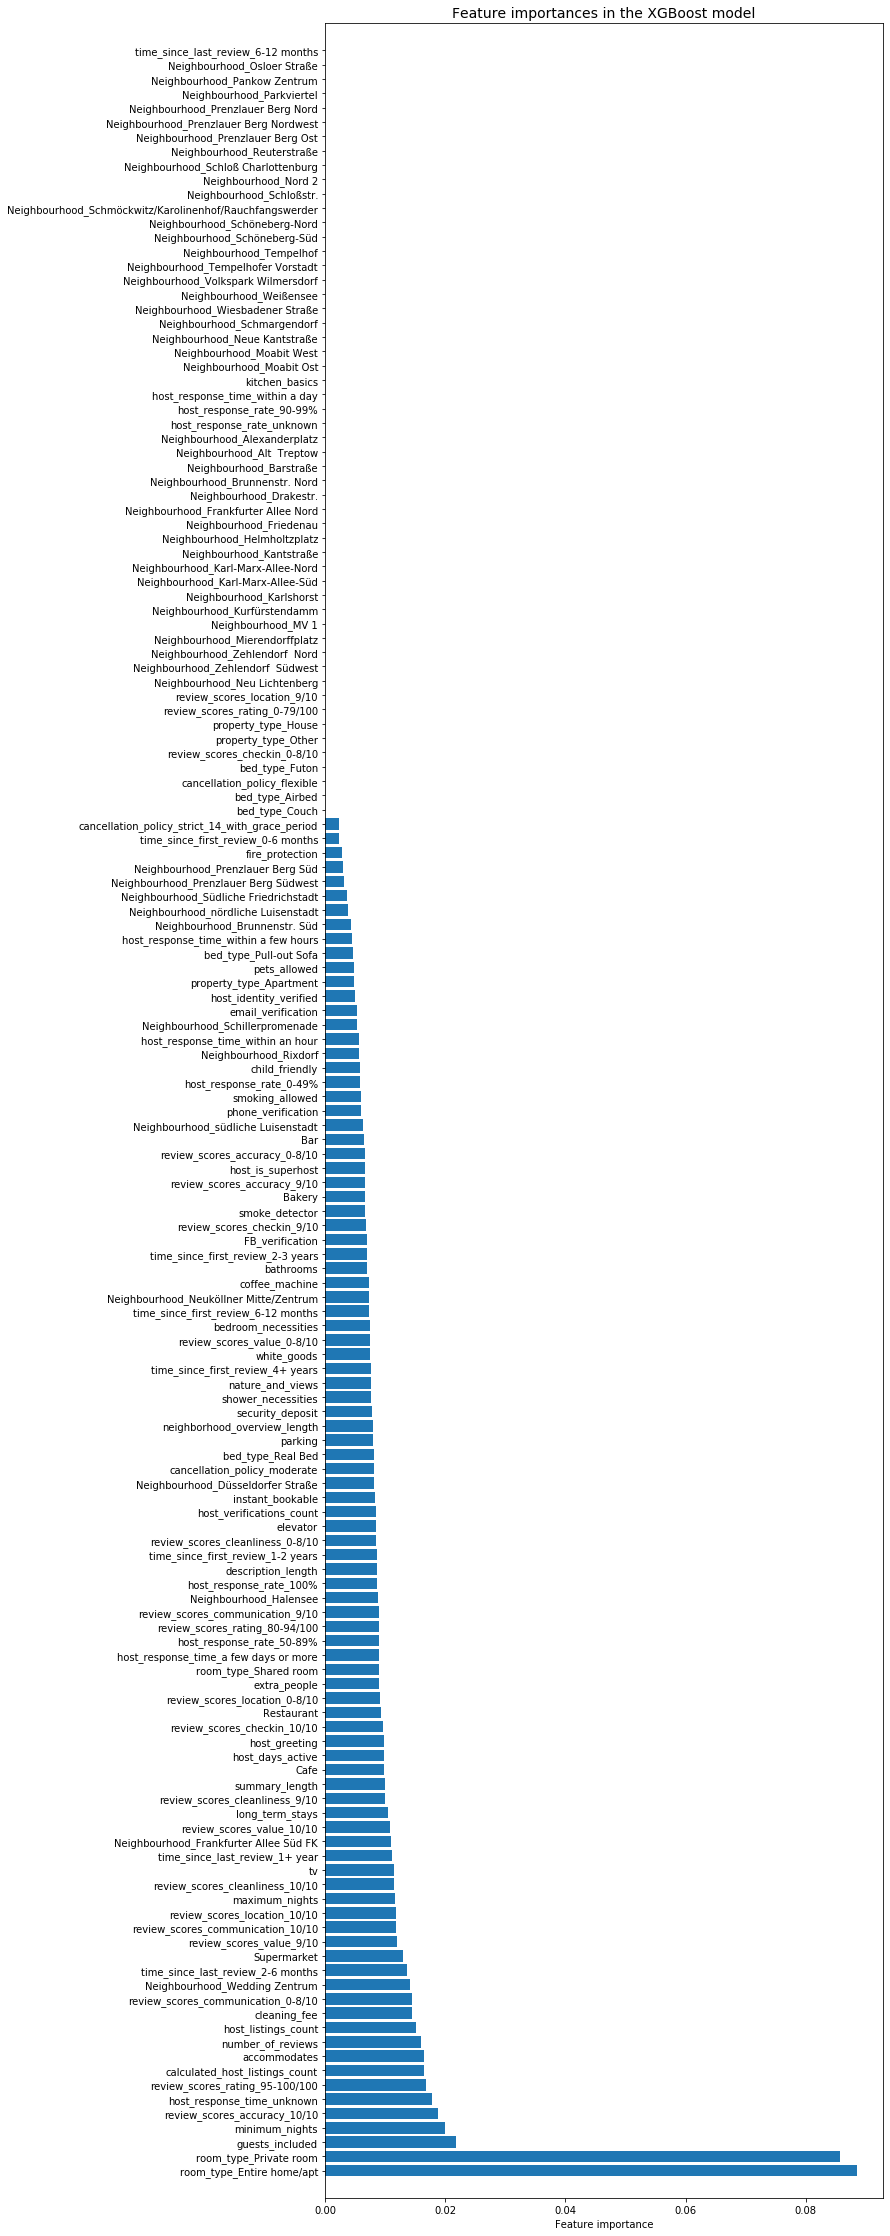

In [25]:
# Plotting feature importances
plt.figure(figsize=(10,40))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

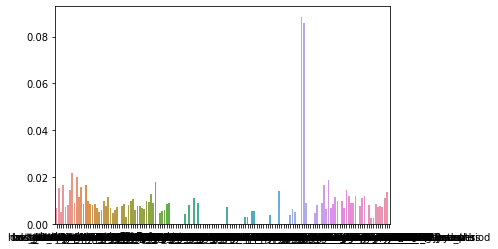

In [26]:
sns.barplot(x=X.columns, y=model.feature_importances_)

In [27]:
b['tv'].mean()

0.44285714285714284

In [28]:
c['tv'].mean()

0.27136752136752135

In [29]:
b['minimum_nights'].mean()

4.097142857142857

In [30]:
c['minimum_nights'].mean()

6.717948717948718